In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
nasData = pd.read_csv("NAS.csv")
nasData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nasData = nasData.dropna(axis="rows")
nasData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [4]:
inputData = nasData.Date
inputData.head(10)

0     2003-12-18
1     2003-12-19
2     2003-12-22
3     2003-12-23
7     2003-12-29
8     2003-12-30
11    2004-01-02
12    2004-01-05
13    2004-01-06
14    2004-01-07
Name: Date, dtype: object

In [5]:
closingPrice = nasData['Adj Close']
closingPrice

0       19.139799
1       18.454201
2       18.054300
3       17.425800
7       17.254400
          ...    
4248     0.676800
4249     0.600600
4250     0.626000
4251     0.605000
4252     0.610600
Name: Adj Close, Length: 4218, dtype: float64

In [6]:
#nasData.plot.scatter(x='Date',y='Adj Close')

In [7]:
modell = LinearRegression()

In [8]:
type(inputData[0])

str

In [9]:
import datetime as dt

In [10]:
dato = nasData['Date']

In [11]:
dato = pd.to_datetime(dato)
dato = dato.map(dt.datetime.toordinal)

In [12]:
dato = dato.to_frame()
dato

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
...,...
4248,737710
4249,737711
4250,737712
4251,737713


In [13]:
type(dato)

pandas.core.frame.DataFrame

In [14]:
type(closingPrice)

pandas.core.series.Series

In [15]:
modell.fit(dato,closingPrice)

LinearRegression()

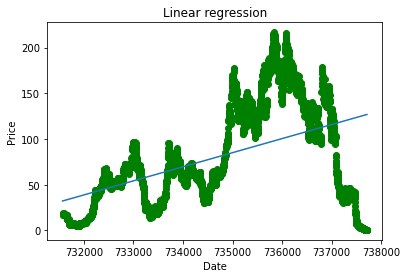

In [16]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato,closingPrice, color = 'green')
plt.plot(dato, modell.predict(dato))
plt.show()

In [17]:
def convertDate(string):
    date = pd.to_datetime(string)
    return dt.datetime.toordinal(date)

In [18]:
x = '2021-05-16'
convertDate(x)

737926

In [19]:
modell.predict([[convertDate(x)]])

array([130.13282895])

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(dato)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, closingPrice)

LinearRegression()

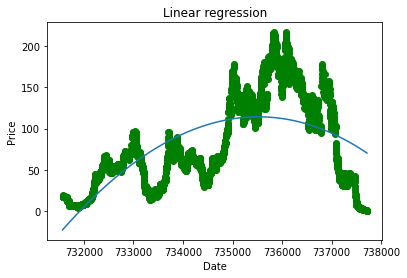

In [32]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato, closingPrice, color = 'green')
plt.plot(dato, pol_reg.predict(X_poly))
plt.show()

In [22]:
dir(poly_reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_combinations',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'degree',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'include_bias',
 'interaction_only',
 'n_features_in_',
 'n_input_features_',
 'n_output_features_',
 'order',
 'powers_',
 'set_params',
 'transform']

In [23]:
print(poly_reg.__dict__)

{'degree': 5, 'interaction_only': False, 'include_bias': True, 'order': 'C', 'n_features_in_': 1, 'n_input_features_': 1, 'n_output_features_': 6}


In [33]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [42]:
degree = 10
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(dato,closingPrice)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

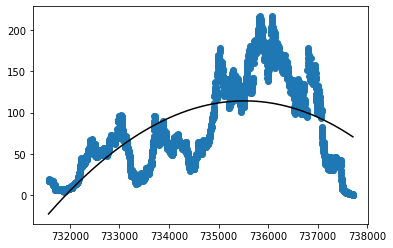

In [43]:
plt.figure()
plt.scatter(dato,closingPrice)
plt.plot(dato,polyreg.predict(dato),color="black")
plt.show()

# Interpolation

In [46]:
import numpy as np

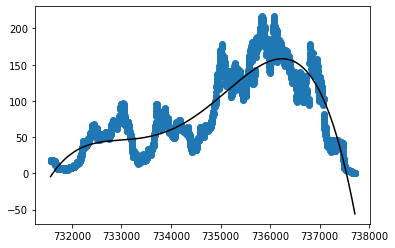

In [60]:
degree = 4
coefs = np.polyfit(dato.values.flatten(), closingPrice.values.flatten(), degree)
plt.figure()
plt.plot(dato, np.polyval(coefs, dato), color="black")
#plt.title("Polyfit degree "+str(degree))
plt.scatter(dato,closingPrice)
plt.show()